In [41]:
import torch
import torch.nn as nn
from torch.autograd import Variable
device = torch.device("cuda:0" if torch.cuda.is_available() else"cpu")
print(device)

cpu


In [42]:
import numpy as np

In [43]:
class Net(nn.Module) :
    def __init__(self) :
        super(Net,self).__init__()
        self.hidden_layer1 = nn.Linear(2,50)
        self.hidden_layer2 = nn.Linear(50,50)
        self.hidden_layer3 = nn.Linear(50,50)
        self.hidden_layer4 = nn.Linear(50,50)
        self.hidden_layer5 = nn.Linear(50,50)
        self.output_layer = nn.Linear(50,1)
        
    def forward(self,x,t) :
        inputs = torch.cat([x,t],axis =1 )
        layer1_out = torch.sigmoid(self.hidden_layer1(inputs))
        layer2_out = torch.sigmoid(self.hidden_layer2(layer1_out))
        layer3_out = torch.sigmoid(self.hidden_layer3(layer2_out))
        layer4_out = torch.sigmoid(self.hidden_layer4(layer3_out))
        layer5_out = torch.sigmoid(self.hidden_layer5(layer4_out))
        output = self.output_layer(layer5_out) 
        return output
    
    
"""
probably the quesion part is activation function. how about tanh??? or sin?
"""

'\nprobably the quesion part is activation function. how about tanh??? or sin?\n'

In [44]:
net = Net() # is what we defined and stands for net.
net = net.to(device) #is to send net calculation to device
mse_cos_function = torch.nn.MSELoss() #is mean squared error loss function
optimizer = torch.optim.Adam(net.parameters()) # is for optimizer name Adam for parameters in our model.


In [45]:
def f(x,t,net) :
    u = net(x,t) # is to let u is given by the network based on independent variables x,t. so we need u_t and u_x
    #define u_t and u_x
    
    u_x = torch.autograd.grad(u.sum(),x,create_graph=True)[0] 
    u_t = torch.autograd.grad(u.sum(),t,create_graph=True)[0] 
    u_xx = torch.autograd.grad(u_x.sum(),x,create_graph=True)[0]
    pde = u_t + u*u_x - (0.01/np.pi)*u_xx
    return pde

In [46]:
#boundary condition

x_bc_1 = np.random.uniform(low=-1.0,high=1.0,size=(500,1))
t_bc_1 = np.zeros((500,1))
u_bc_1 = -np.sin(np.pi*x_bc_1)

##############################################
#########above is for u(x,0)##################
##############################################

x_bc_2 = np.full((500,1),-1.0)
x_bc_3 = np.full((500,1),1.0)
t_bc_2 = np.random.uniform(low=0.0,high=1.0,size=(500,1))
u_bc_2 = np.zeros((500,1))


In [47]:
iterations = 20000
previous_validation_loss=99999999.0

for epoch in range(iterations) :
    optimizer.zero_grad()
    
    #loss based on bc
    
    pt_x_bc_1 = Variable(torch.from_numpy(x_bc_1).float(),requires_grad=False).to(device)
    pt_t_bc_1 = Variable(torch.from_numpy(t_bc_1).float(),requires_grad=False).to(device) 
    pt_u_bc_1 = Variable(torch.from_numpy(u_bc_1).float(),requires_grad=False).to(device)
    
    net_bc_out_1 = net(pt_x_bc_1,pt_t_bc_1)
    mse_u_1 = mse_cos_function(net_bc_out_1,pt_u_bc_1)
    
    pt_x_bc_2 = Variable(torch.from_numpy(x_bc_2).float(),requires_grad=False).to(device)
    pt_x_bc_3 = Variable(torch.from_numpy(x_bc_3).float(),requires_grad=False).to(device) 
    pt_t_bc_2 = Variable(torch.from_numpy(t_bc_2).float(),requires_grad=False).to(device)
    pt_u_bc_2 = Variable(torch.from_numpy(u_bc_2).float(),requires_grad=False).to(device)
    
    net_bc_out_2 = net(pt_x_bc_2,pt_t_bc_2)
    net_bc_out_3 = net(pt_x_bc_3,pt_t_bc_2)
    mse_u_2 = mse_cos_function(net_bc_out_2,pt_u_bc_2)
    mse_u_3 = mse_cos_function(net_bc_out_3,pt_u_bc_2)
    
    #loss based on PDE
    
    x_collocation = np.random.uniform(low=-1.0,high=1.0,size=(500,1))
    t_collocation = np.random.uniform(low=0.0,high=1.0,size=(500,1))
    all_zeros = np.zeros((500,1))
    
    pt_x_collocation = Variable(torch.from_numpy(x_collocation).float(),requires_grad=True).to(device)
    pt_t_collocation = Variable(torch.from_numpy(t_collocation).float(), requires_grad=True).to(device)
    pt_all_zeros = Variable(torch.from_numpy(all_zeros).float(), requires_grad=False).to(device)
    
    f_out = f(pt_x_collocation,pt_t_collocation,net)
    mse_f = mse_cos_function(f_out,pt_all_zeros)
    
    loss = mse_u_1 + mse_u_2 + mse_u_3 + mse_f
    
    loss.backward()
    
    optimizer.step()
    
    with torch.autograd.no_grad():
        print(epoch,"training loss",loss.data)

0 training loss tensor(0.5005)
1 training loss tensor(0.4972)
2 training loss tensor(0.4996)
3 training loss tensor(0.4979)
4 training loss tensor(0.4965)
5 training loss tensor(0.4972)
6 training loss tensor(0.4981)
7 training loss tensor(0.4976)
8 training loss tensor(0.4967)
9 training loss tensor(0.4965)
10 training loss tensor(0.4970)
11 training loss tensor(0.4973)
12 training loss tensor(0.4970)
13 training loss tensor(0.4966)
14 training loss tensor(0.4964)
15 training loss tensor(0.4967)
16 training loss tensor(0.4969)
17 training loss tensor(0.4968)
18 training loss tensor(0.4965)
19 training loss tensor(0.4964)
20 training loss tensor(0.4965)
21 training loss tensor(0.4967)
22 training loss tensor(0.4966)
23 training loss tensor(0.4965)
24 training loss tensor(0.4964)
25 training loss tensor(0.4964)
26 training loss tensor(0.4965)
27 training loss tensor(0.4965)
28 training loss tensor(0.4964)
29 training loss tensor(0.4963)
30 training loss tensor(0.4964)
31 training loss t

In [48]:
import torch
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

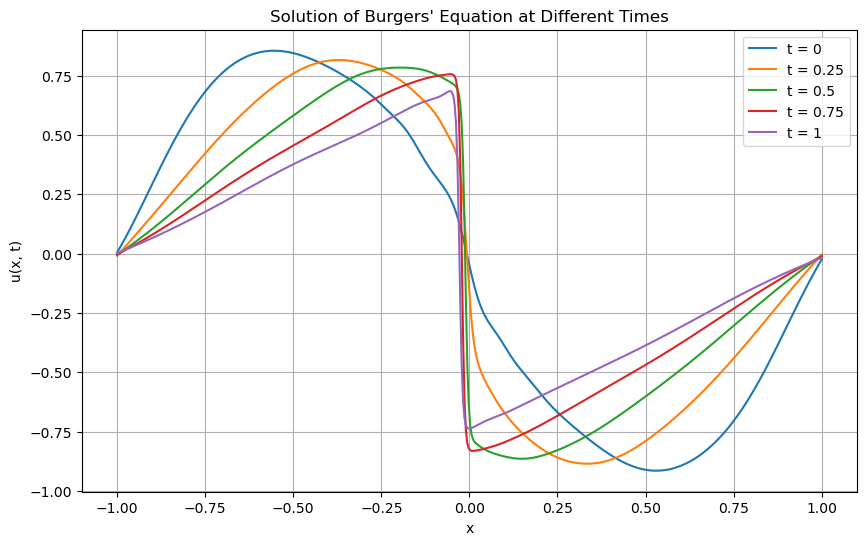

'\n...시원하게 조졌습니다.\n'

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Function to plot the results for specific times
def plot_solution_at_times(net, x_values, t_values, device):
    net.eval()  # Put the network in evaluation mode
    plt.figure(figsize=(10, 6))

    for t in t_values:
        # Prepare x and t inputs
        t_fixed = np.full((x_values.shape[0], 1), t)
        pt_x = torch.from_numpy(x_values).float().to(device)
        pt_t = torch.from_numpy(t_fixed).float().to(device)

        # Predict u(x, t) using the trained network
        with torch.no_grad():
            u_pred = net(pt_x, pt_t)
            u_pred = u_pred.cpu().numpy()  # Convert back to NumPy

        # Plot u(x, t) for this specific t
        plt.plot(x_values, u_pred, label=f"t = {t}")

    plt.title("Solution of Burgers' Equation at Different Times")
    plt.xlabel("x")
    plt.ylabel("u(x, t)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the x-values and t-values for evaluation
x_values = np.linspace(-1, 1, 500).reshape(-1, 1)  # 500 points in x
t_values = [0, 0.25, 0.5, 0.75, 1]  # Specific time points

# Plot the solution
plot_solution_at_times(net, x_values, t_values, device)


"""
...시원하게 조졌습니다.
"""